<a href="https://colab.research.google.com/github/DIFACQUIM/De-Novo_DNMT1/blob/main/06_Diversity_maccs_ecfp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cumulative similarity distribution**

Code from: https://github.com/DIFACQUIM/Food_chemicals_characterization/blob/main/codes/maccs_ecfp_similarity_copy.ipynb

## **Configure the environment**

In [ ]:
!pip install rdkit

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

### **Mount data sets**

In [ ]:
DNMT1 = pd.read_csv("https://raw.githubusercontent.com/DIFACQUIM/De-Novo_DNMT1/main/DNMT1_10micM_285_curated.csv")
alva = pd.read_csv("https://raw.githubusercontent.com/DIFACQUIM/De-Novo_DNMT1/main/alvaBuilder/Alva2023_5575.csv")

In [ ]:
print(DNMT1.columns)
print(alva.columns)

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'NEW_SMILES'],
      dtype='object')
Ind

In [ ]:
CDDNMT = alva[alva["DATABASE"].str.contains("AB_CDDNMT")]
CDEPI = alva[alva["DATABASE"].str.contains("AB_CDEPI")]
CDSOL = alva[alva["DATABASE"].str.contains("AB_CDSOL")]
ABDNMT = alva[alva["DATABASE"].str.contains("AB_DNMT1")]
FOODB = alva[alva["DATABASE"].str.contains("AB_FOODB")]
LCDIV = alva[alva["DATABASE"].str.contains("AB_LCDIV")]
LCEPI = alva[alva["DATABASE"].str.contains("AB_LCEPI")]
UNPDA = alva[alva["DATABASE"].str.contains("AB_UNPDA")]

## **Define functions**

In [ ]:
def MACCSkeys_fp (smi):
    fps = pd.DataFrame([[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(167)]], metric="jaccard") # Similarity Matrix
    return SimMat

In [ ]:
def ECFP (smi, r):
    fps = pd.DataFrame([[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), r, nBits=1024).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(1024)]], metric="jaccard") # Similarity Matrix
    return SimMat

## **Apply functions and sort results**

In [ ]:
SimMACCS_DNMT1 = np.sort(MACCSkeys_fp(DNMT1['NEW_SMILES']))
SimMACCS_CDDNMT = np.sort(MACCSkeys_fp(CDDNMT['SMILES_chiral']))
SimMACCS_CDEPI = np.sort(MACCSkeys_fp(CDEPI['SMILES_chiral']))
SimMACCS_CDSOL = np.sort(MACCSkeys_fp(CDSOL['SMILES_chiral']))
SimMACCS_ABDNMT = np.sort(MACCSkeys_fp(ABDNMT['SMILES_chiral']))
SimMACCS_FOODB = np.sort(MACCSkeys_fp(FOODB['SMILES_chiral']))
SimMACCS_LCDIV = np.sort(MACCSkeys_fp(LCDIV['SMILES_chiral']))
SimMACCS_LCEPI = np.sort(MACCSkeys_fp(LCEPI['SMILES_chiral']))
SimMACCS_UNPDA = np.sort(MACCSkeys_fp(UNPDA['SMILES_chiral']))

In [ ]:
SimECFP4_DNMT1 = np.sort(ECFP(DNMT1['NEW_SMILES'], 2))
SimECFP4_CDDNMT = np.sort(ECFP(CDDNMT['SMILES_chiral'], 2))
SimECFP4_CDEPI = np.sort(ECFP(CDEPI['SMILES_chiral'], 2))
SimECFP4_CDSOL = np.sort(ECFP(CDSOL['SMILES_chiral'], 2))
SimECFP4_ABDNMT = np.sort(ECFP(ABDNMT['SMILES_chiral'], 2))
SimECFP4_FOODB = np.sort(ECFP(FOODB['SMILES_chiral'], 2))
SimECFP4_LCDIV = np.sort(ECFP(LCDIV['SMILES_chiral'], 2))
SimECFP4_LCEPI = np.sort(ECFP(LCEPI['SMILES_chiral'], 2))
SimECFP4_UNPDA = np.sort(ECFP(UNPDA['SMILES_chiral'], 2))

In [ ]:
# calculate the proportional values of samples for MACCS keys
proportionMACCS_DNMT1 = 1. * np.arange(len(SimMACCS_DNMT1)) / (len(SimMACCS_DNMT1) - 1)
print(len(proportionMACCS_DNMT1))
proportionMACCS_CDDNMT = 1. * np.arange(len(SimMACCS_CDDNMT)) / (len(SimMACCS_CDDNMT) - 1)
print(len(proportionMACCS_CDDNMT))
proportionMACCS_CDEPI = 1. * np.arange(len(SimMACCS_CDEPI)) / (len(SimMACCS_CDEPI) - 1)
print(len(proportionMACCS_CDEPI))
proportionMACCS_CDSOL = 1. * np.arange(len(SimMACCS_CDSOL)) / (len(SimMACCS_CDSOL) - 1)
print(len(proportionMACCS_CDSOL))
proportionMACCS_ABDNMT = 1. * np.arange(len(SimMACCS_ABDNMT)) / (len(SimMACCS_ABDNMT) - 1)
print(len(proportionMACCS_ABDNMT))
proportionMACCS_FOODB = 1. * np.arange(len(SimMACCS_FOODB)) / (len(SimMACCS_FOODB) - 1)
print(len(proportionMACCS_FOODB))
proportionMACCS_LCDIV = 1. * np.arange(len(SimMACCS_LCDIV)) / (len(SimMACCS_LCDIV) - 1)
print(len(proportionMACCS_LCDIV))
proportionMACCS_LCEPI = 1. * np.arange(len(SimMACCS_LCEPI)) / (len(SimMACCS_LCEPI) - 1)
print(len(proportionMACCS_LCEPI))
proportionMACCS_UNPDA = 1. * np.arange(len(SimMACCS_UNPDA)) / (len(SimMACCS_UNPDA) - 1)
print(len(proportionMACCS_UNPDA))

40470
243951
244650
244650
244650
243951
244650
244650
228826


In [ ]:
# calculate the proportional values of samples for ECFP4
proportionECFP_DNMT1 = 1. * np.arange(len(SimECFP4_DNMT1)) / (len(SimECFP4_DNMT1) - 1)
print(len(proportionECFP_DNMT1))
proportionECFP_CDDNMT = 1. * np.arange(len(SimECFP4_CDDNMT)) / (len(SimECFP4_CDDNMT) - 1)
print(len(proportionECFP_CDDNMT))
proportionECFP_CDEPI = 1. * np.arange(len(SimECFP4_CDEPI)) / (len(SimECFP4_CDEPI) - 1)
print(len(proportionECFP_CDEPI))

40470
243951
244650


### **Plot results**

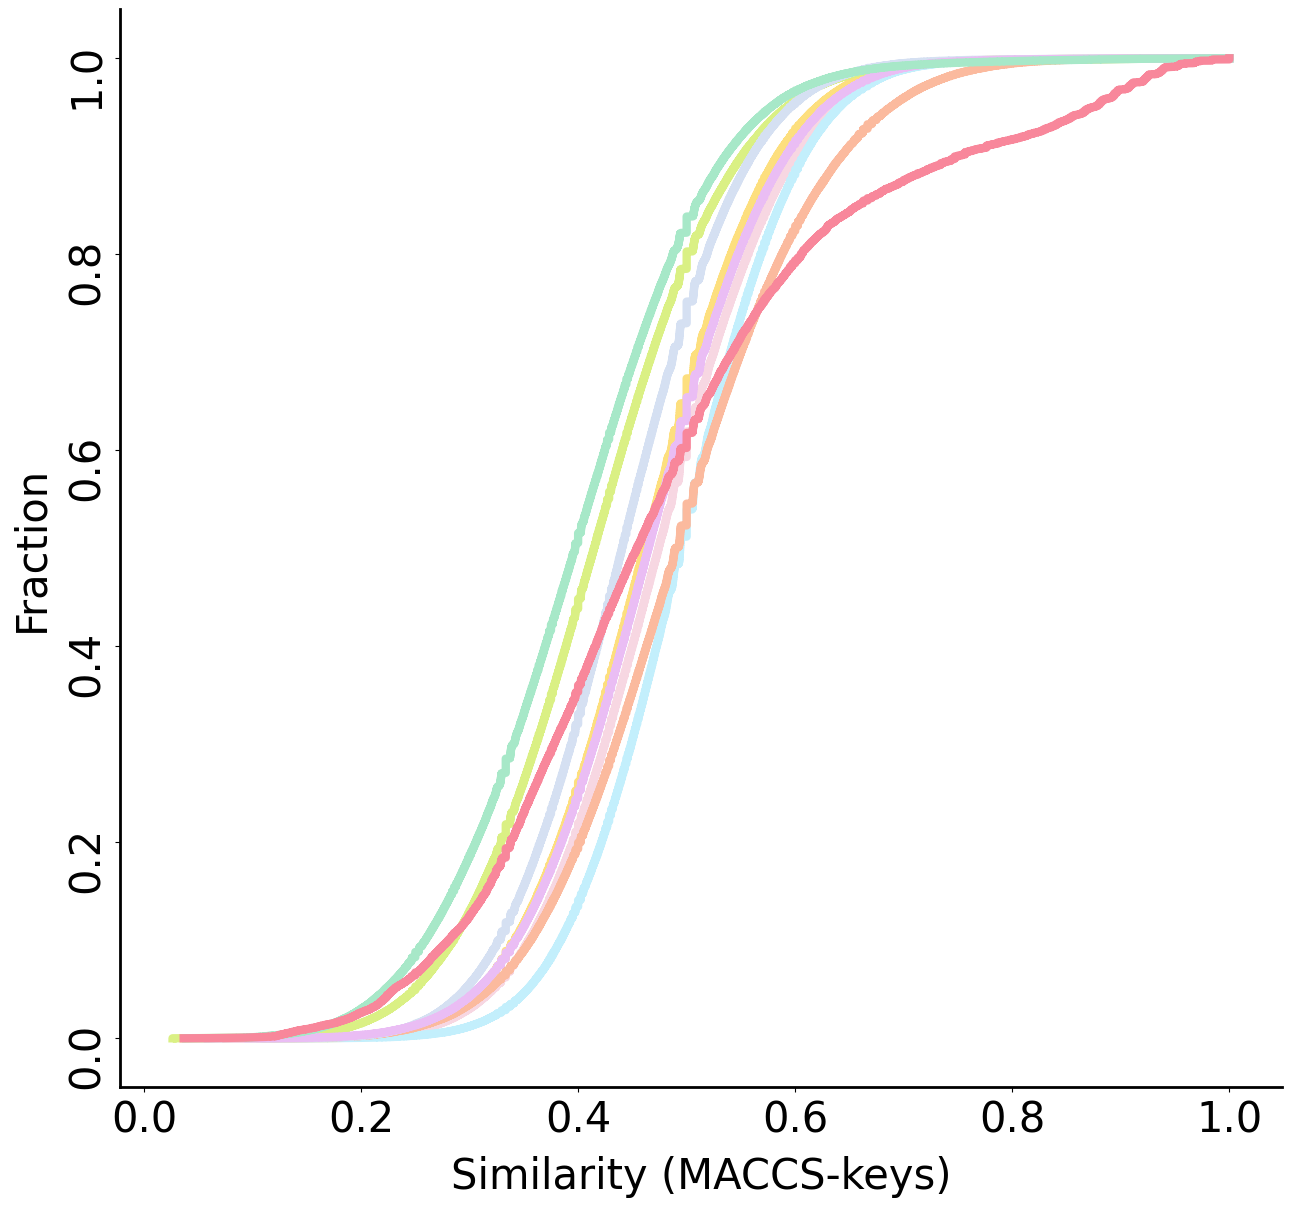

In [ ]:
# Figure 1 - MACCSkeys
plt.figure(figsize=(15, 14))
plt.plot(SimMACCS_CDDNMT, proportionMACCS_CDDNMT, label="ChemDiv DNMT", c="#FDDF7E", lw = 6, linestyle = "-")
plt.plot(SimMACCS_CDEPI, proportionMACCS_CDEPI, label="ChemDiv epigenetics", c="#F7D7E2", lw = 6, linestyle = "-")
plt.plot(SimMACCS_CDSOL, proportionMACCS_CDSOL, label="ChemDiv soluble", c="#C3EFFC", lw = 6, linestyle = "-")
plt.plot(SimMACCS_ABDNMT, proportionMACCS_ABDNMT, label="DNMT1 actives", c="#FBBA9E", lw = 6, linestyle = "-")
plt.plot(SimMACCS_FOODB, proportionMACCS_FOODB, label="FooDB", c="#DAF084", lw = 6, linestyle = "-")
plt.plot(SimMACCS_LCDIV, proportionMACCS_LCDIV, label="Life Chemicals Diverse", c="#D5E0F2", lw = 6, linestyle = "-")
plt.plot(SimMACCS_LCEPI, proportionMACCS_LCEPI, label="Life Chemicals epigenetics", c="#EABDF4", lw = 6, linestyle = "-")
plt.plot(SimMACCS_UNPDA, proportionMACCS_UNPDA, label="UNPD-A", c="#A7E8C8", lw = 6, linestyle = "-")
plt.plot(SimMACCS_DNMT1, proportionMACCS_DNMT1, label="ChEMBL actives", c="#F8879B", lw = 6, linestyle = "-")

plt.xlabel('Similarity (MACCS-keys)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)

plt.savefig('diversity_maccs.png', bbox_inches = 'tight', pad_inches = 0, dpi = 400)

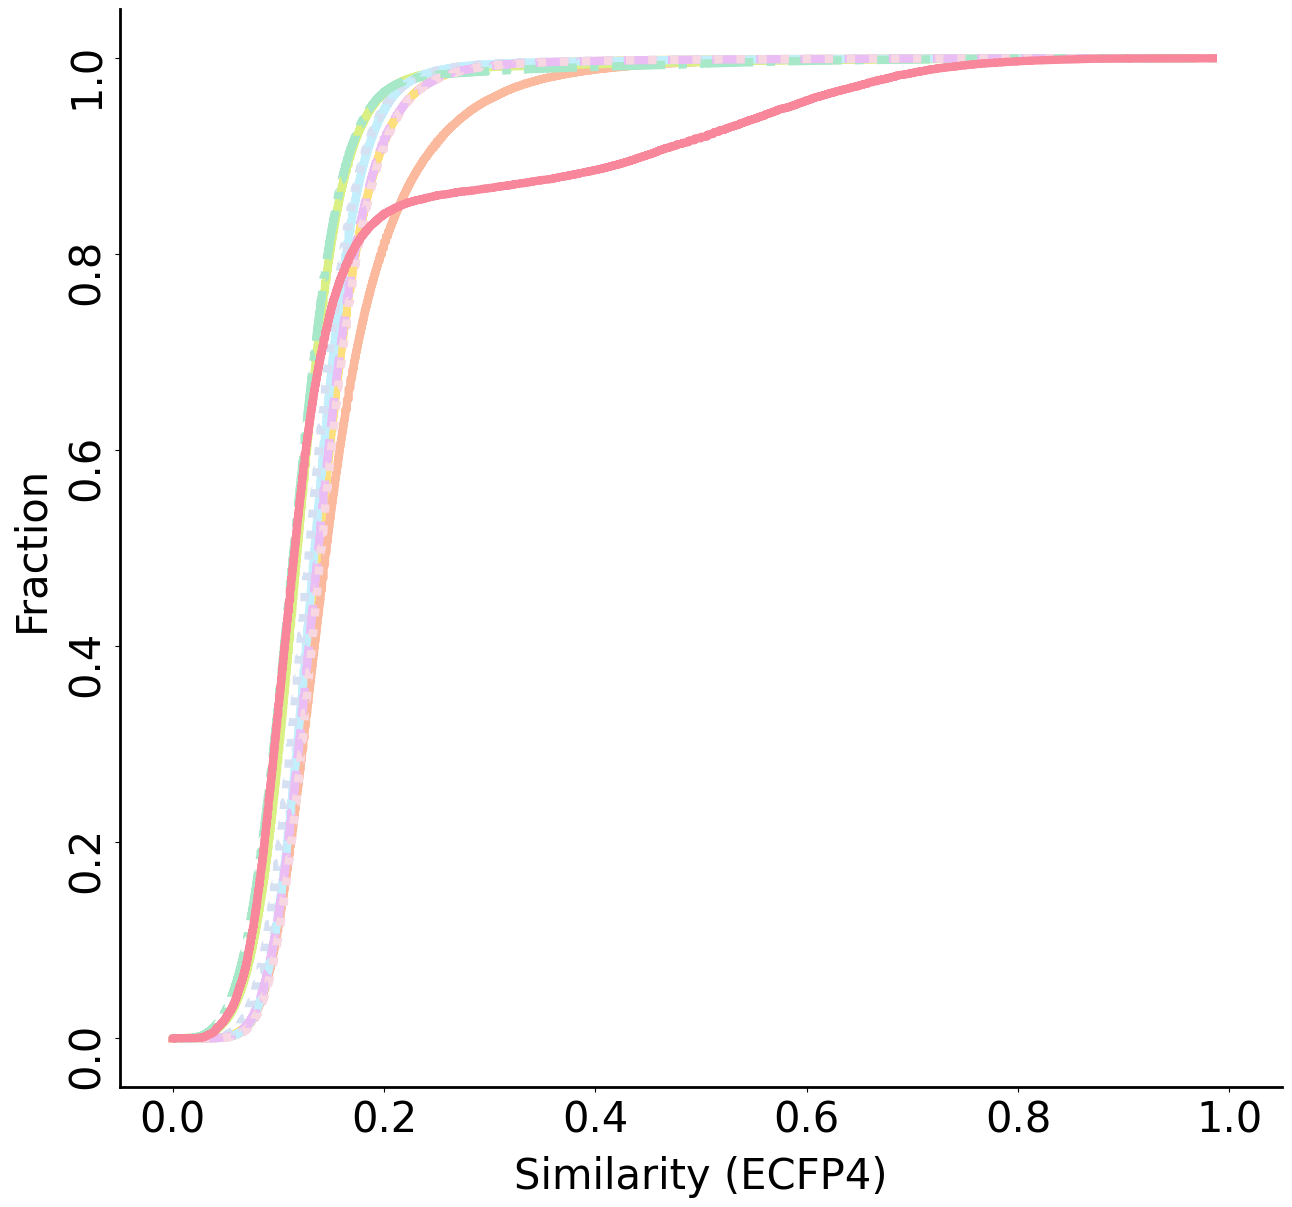

In [ ]:
# Figure 2 - ECFP4
plt.figure(figsize=(15, 14))
plt.plot(SimECFP4_CDDNMT, proportionMACCS_CDDNMT, label="ChemDiv DNMT", c="#FDDF7E", lw = 6, linestyle = "-")
plt.plot(SimECFP4_ABDNMT, proportionMACCS_ABDNMT, label="DNMT1 actives", c="#FBBA9E", lw = 6, linestyle = "-")
plt.plot(SimECFP4_FOODB, proportionMACCS_FOODB, label="FooDB", c="#DAF084", lw = 6, linestyle = "-")
plt.plot(SimECFP4_CDSOL, proportionMACCS_CDSOL, label="ChemDiv soluble", c="#C3EFFC", lw = 6, linestyle = "-")
plt.plot(SimECFP4_LCDIV, proportionMACCS_LCDIV, label="Life Chemicals diverse", c="#D5E0F2", lw = 6, linestyle = ":")
plt.plot(SimECFP4_UNPDA, proportionMACCS_UNPDA, label="UNPD-A", c="#A7E8C8", lw = 6, linestyle = "-.")
plt.plot(SimECFP4_LCEPI, proportionMACCS_LCEPI, label="Life Chemicals epigenetics", c="#EABDF4", lw = 6, linestyle = "--")
plt.plot(SimECFP4_CDEPI, proportionMACCS_CDEPI, label="ChemDiv epigenetics", c="#F7D7E2", lw = 6, linestyle = ":")
plt.plot(SimECFP4_DNMT1, proportionMACCS_DNMT1, label="ChEMBL actives", c="#F8879B", lw = 6, linestyle = "-")

plt.xlabel('Similarity (ECFP4)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)

plt.savefig('diversity_ecfp4.png', bbox_inches = 'tight', pad_inches = 0, dpi = 400)

## **Compute stats**

In [ ]:
#MACCS-keys statistics
maccs_dnmt1 = pd.DataFrame(SimMACCS_DNMT1, columns = ['MACCS_DNMT1'])
maccs_dnmt1 = maccs_dnmt1.describe()

maccs_cddnmt = pd.DataFrame(SimMACCS_CDDNMT, columns = ['MACCS_CDDNMT'])
maccs_cddnmt = maccs_cddnmt.describe()

maccs_abdnmt = pd.DataFrame(SimMACCS_ABDNMT, columns = ['MACCS_ABDNMT'])
maccs_abdnmt = maccs_abdnmt.describe()

maccs_foodb = pd.DataFrame(SimMACCS_FOODB, columns = ['MACCS_FOODB'])
maccs_foodb = maccs_foodb.describe()

maccs_cdsol = pd.DataFrame(SimMACCS_CDSOL, columns = ['MACCS_CDSOL'])
maccs_cdsol = maccs_cdsol.describe()

maccs_lcdiv = pd.DataFrame(SimMACCS_LCDIV, columns = ['MACCS_LCDIV'])
maccs_lcdiv = maccs_lcdiv.describe()

maccs_lcepi = pd.DataFrame(SimMACCS_LCEPI, columns = ['MACCS_LCEPI'])
maccs_lcepi = maccs_lcepi.describe()

maccs_cdepi = pd.DataFrame(SimMACCS_CDEPI, columns = ['MACCS_CDEPI'])
maccs_cdepi = maccs_cdepi.describe()

maccs_unpda = pd.DataFrame(SimMACCS_UNPDA, columns = ['MACCS_UNPDA'])
maccs_unpda = maccs_unpda.describe()

data_maccs = pd.concat([maccs_dnmt1, maccs_cddnmt, maccs_abdnmt,
                  maccs_foodb, maccs_cdsol, maccs_lcdiv,
                  maccs_lcepi, maccs_cdepi, maccs_unpda
                 ], axis = 1)

In [ ]:
data_maccs = data_maccs.round(3)

In [ ]:
data_maccs

,MACCS_DNMT1,MACCS_CDDNMT,MACCS_ABDNMT,MACCS_FOODB,MACCS_CDSOL,MACCS_LCDIV,MACCS_LCEPI,MACCS_CDEPI,MACCS_UNPDA
count,40470.000,243951.000,244650.000,243951.000,244650.000,244650.000,244650.000,244650.000,228826.000
mean,0.482,0.462,0.495,0.417,0.495,0.443,0.466,0.476,0.399
std,0.179,0.095,0.112,0.106,0.088,0.092,0.098,0.096,0.110
min,0.037,0.113,0.076,0.026,0.111,0.096,0.059,0.107,0.039
25%,0.357,0.397,0.419,0.346,0.436,0.380,0.400,0.410,0.324
50%,0.455,0.461,0.490,0.415,0.494,0.440,0.465,0.474,0.397
75%,0.570,0.525,0.568,0.484,0.554,0.500,0.531,0.539,0.470
max,1.000,1.000,0.986,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
#ECFP4 statistics
ecfp4_dnmt1 = pd.DataFrame(SimECFP4_DNMT1, columns = ['ECFP4_DNMT1'])
ecfp4_dnmt1 = ecfp4_dnmt1.describe()

ecfp4_cddnmt = pd.DataFrame(SimECFP4_CDDNMT, columns = ['ECFP4_CDDNMT'])
ecfp4_cddnmt = ecfp4_cddnmt.describe()

ecfp4_abdnmt = pd.DataFrame(SimECFP4_ABDNMT, columns = ['ECFP4_ABDNMT'])
ecfp4_abdnmt = ecfp4_abdnmt.describe()

ecfp4_foodb = pd.DataFrame(SimECFP4_FOODB, columns = ['ECFP4_FOODB'])
ecfp4_foodb = ecfp4_foodb.describe()

ecfp4_cdsol = pd.DataFrame(SimECFP4_CDSOL, columns = ['ECFP4_CDSOL'])
ecfp4_cdsol = ecfp4_cdsol.describe()

ecfp4_lcdiv = pd.DataFrame(SimECFP4_LCDIV, columns = ['ECFP4_LCDIV'])
ecfp4_lcdiv = ecfp4_lcdiv.describe()

ecfp4_lcepi = pd.DataFrame(SimECFP4_LCEPI, columns = ['ECFP4_LCEPI'])
ecfp4_lcepi = ecfp4_lcepi.describe()

ecfp4_cdepi = pd.DataFrame(SimECFP4_CDEPI, columns = ['ECFP4_CDEPI'])
ecfp4_cdepi = ecfp4_cdepi.describe()

ecfp4_unpda = pd.DataFrame(SimECFP4_UNPDA, columns = ['ECFP4_UNPDA'])
ecfp4_unpda = ecfp4_unpda.describe()


data_ecfp4 = pd.concat([ecfp4_dnmt1, ecfp4_cddnmt, ecfp4_abdnmt,
                  ecfp4_foodb, ecfp4_cdsol, ecfp4_lcdiv,
                  ecfp4_lcepi, ecfp4_cdepi, ecfp4_unpda
                 ], axis = 1)

In [ ]:
data_ecfp4 = data_ecfp4.round(3)
data_ecfp4

,ECFP4_DNMT1,ECFP4_CDDNMT,ECFP4_ABDNMT,ECFP4_FOODB,ECFP4_CDSOL,ECFP4_LCDIV,ECFP4_LCEPI,ECFP4_CDEPI,ECFP4_UNPDA
count,40470.000,243951.000,244650.000,243951.000,244650.000,244650.000,244650.000,244650.000,228826.000
mean,0.171,0.145,0.161,0.124,0.139,0.134,0.144,0.146,0.121
std,0.156,0.046,0.068,0.052,0.043,0.044,0.046,0.046,0.059
min,0.000,0.018,0.010,0.000,0.019,0.010,0.028,0.027,0.000
25%,0.092,0.116,0.118,0.096,0.113,0.107,0.115,0.118,0.091
50%,0.116,0.139,0.146,0.118,0.135,0.130,0.138,0.140,0.115
75%,0.152,0.167,0.184,0.143,0.158,0.155,0.165,0.167,0.140
max,0.984,0.905,0.917,0.967,0.923,0.864,0.879,0.912,1.000


https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python